In [6]:
import os
import pandas as pd
from scipy import misc
import tensorflow
from tensorflow import keras
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg 
from pathlib import Path
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D

355
355
(355, 256, 256)
(355, 244, 244)
(355, 256, 256, 1)
(355, 244, 244, 1)


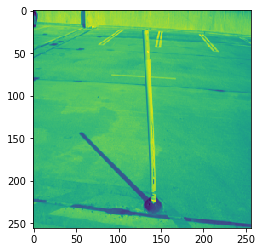

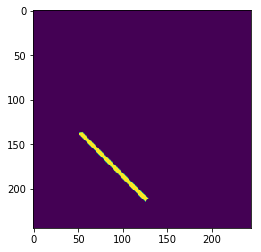

In [14]:
def draw_image(img):
    plt.imshow(img)
    plt.show()
    
p = Path("Downloads/cleaned_training/data/Tappen/img")
images = []
masks = []

cnt = 0
for i in sorted(p.glob("*.jpg")):
    string = str(i)
    img = cv2.imread(string)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(256,256))
    images.append(img)
    cnt += 1
print(cnt)

cnt1 = 0
for i in sorted(p.glob("*.png")):
    string = str(i)
    img = cv2.imread(string)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(244,244))
    masks.append(img)
    cnt1 += 1
print(cnt1)


X = np.array(images)/255.0
Y = np.array(masks)/244.0
X_ = np.expand_dims(X, axis=3)
Y_ = np.expand_dims(Y, axis=3)
print(X.shape)
print(Y.shape)
print(X_.shape)
print(Y_.shape)
draw_image(X[0])
draw_image(Y[0])

In [17]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(256, 256,1)))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(1, (5,5)))
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(X_, Y_, epochs=3)

Epoch 1/3
355/355 [==============================] - 280s 790ms/step - loss: 0.7744
Epoch 2/3
355/355 [==============================] - 250s 705ms/step - loss: 0.4414
Epoch 3/3
355/355 [==============================] - 249s 701ms/step - loss: 0.4079


(21, 256, 256, 1)
(21, 244, 244)
<class 'numpy.ndarray'>


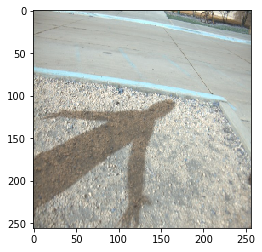

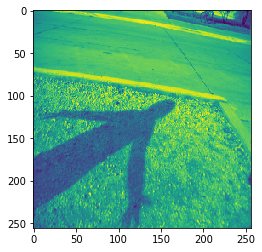

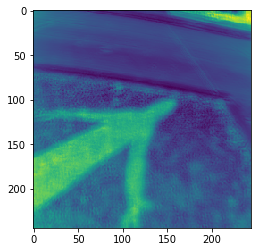

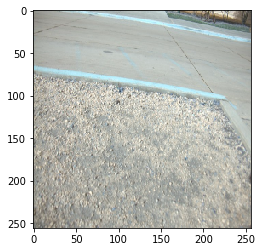

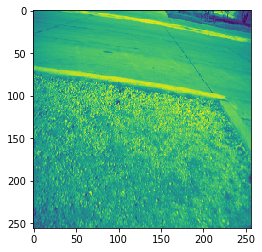

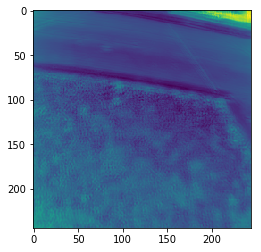

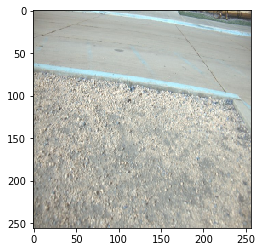

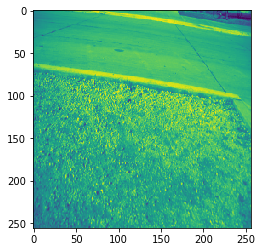

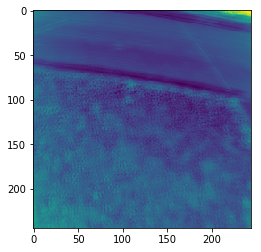

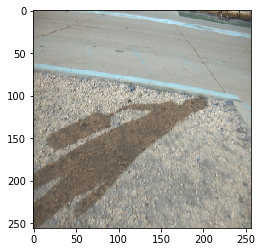

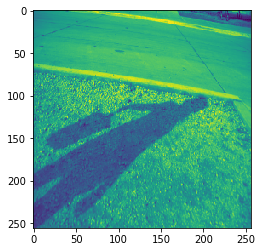

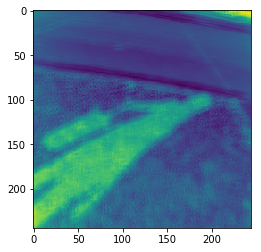

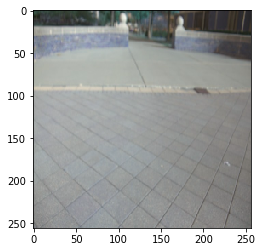

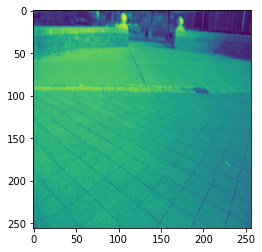

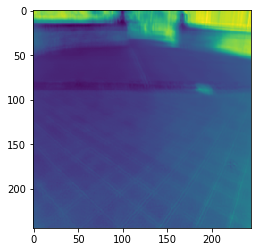

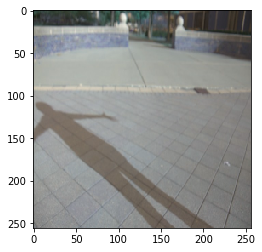

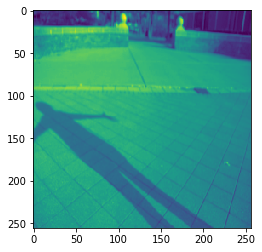

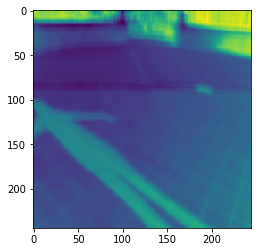

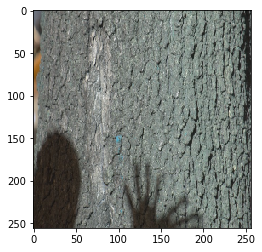

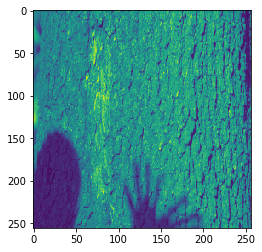

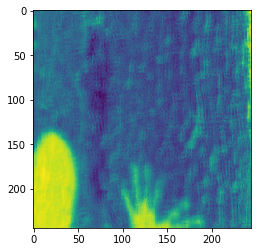

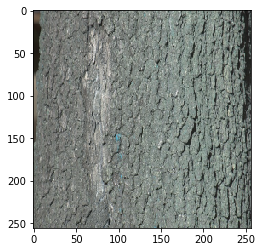

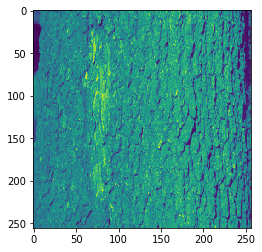

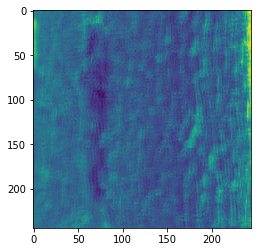

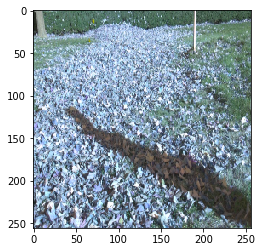

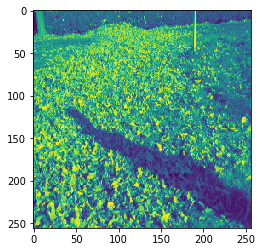

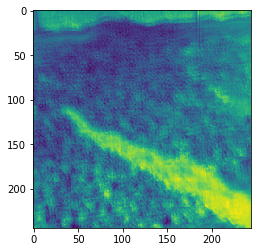

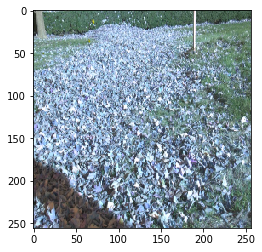

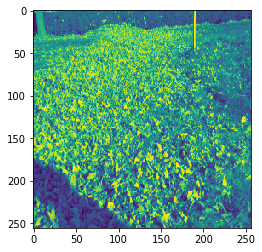

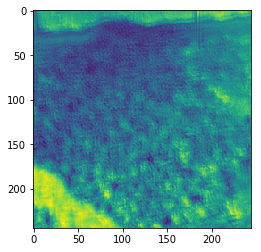

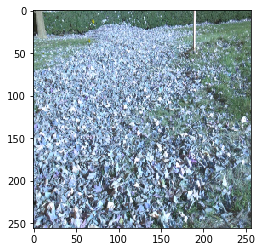

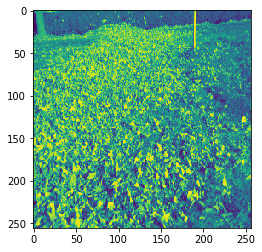

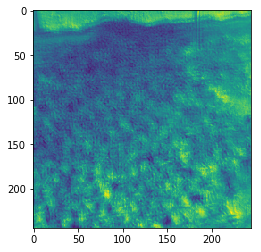

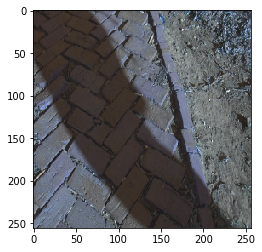

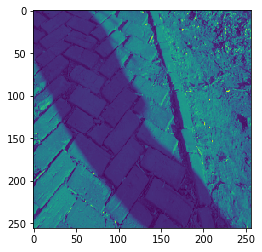

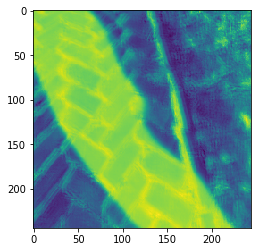

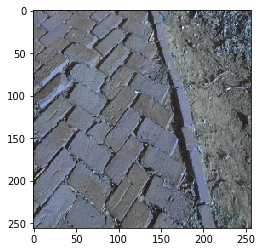

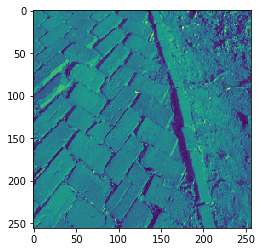

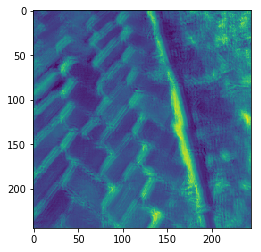

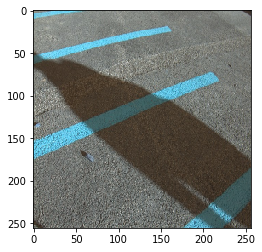

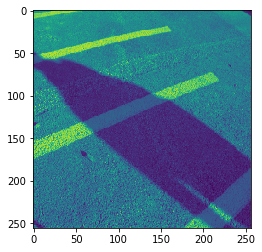

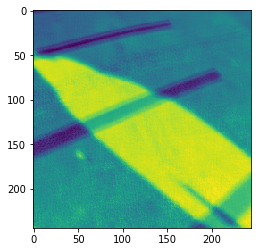

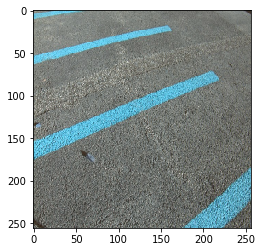

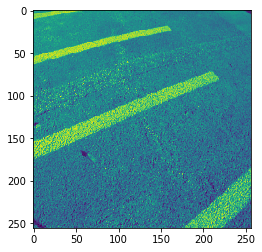

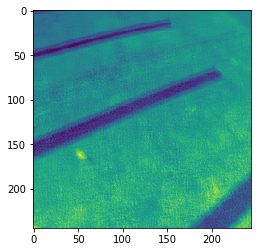

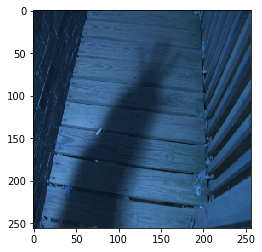

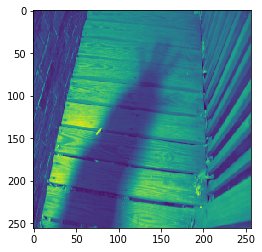

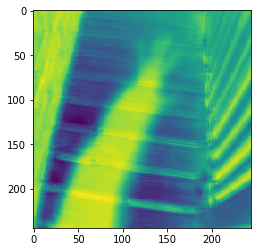

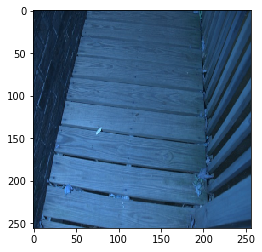

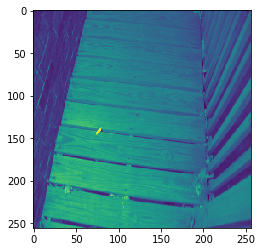

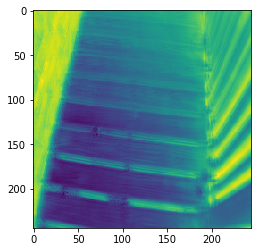

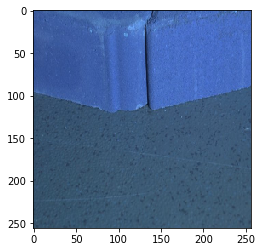

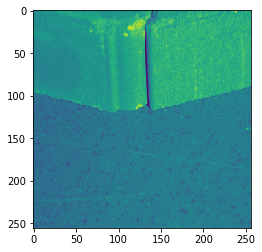

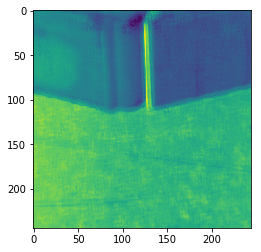

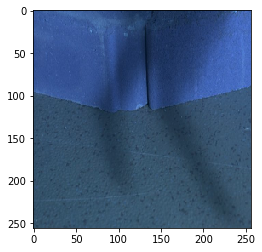

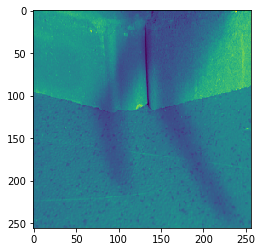

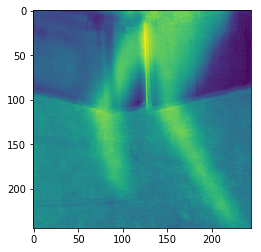

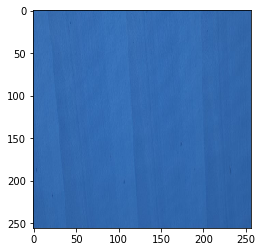

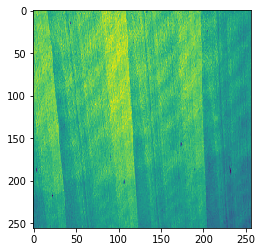

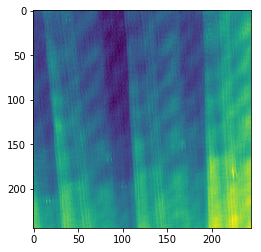

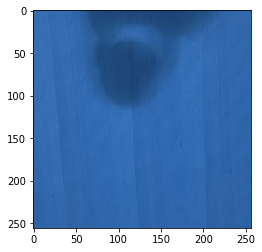

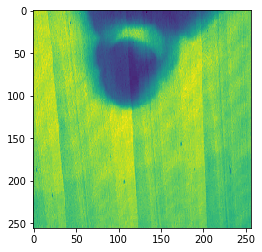

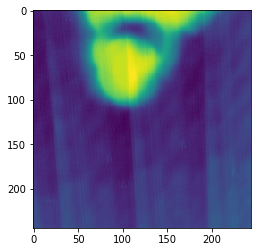

In [18]:
test = []
original = []
p1 = Path("Downloads/cleaned_training/data/Our_test/img")
cnt = 0
for i in sorted(p1.glob("*.jpg")):
    if cnt > 20:
        break
    string = str(i)
    img = cv2.imread(string)
    img = cv2.resize(img,(256,256))
    original.append(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test.append(img)
    cnt += 1

X_test = np.array(test)/255.0
X_test = np.expand_dims(X_test, axis=3)
print(X_test.shape)
Y_test = model.predict(X_test)*244
Y_test = np.squeeze(Y_test, axis=3)
print(Y_test.shape)
print(type(Y_test))
for i in range(21):
    draw_image(original[i])
    draw_image(test[i])
    draw_image(Y_test[i])